In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
X_train = np.load("RavdessAudioOnlyNumpy__X_train.npy")
X_test = np.load("RavdessAudioOnlyNumpy__X_test.npy")
y_train=pd.read_csv("RavdessAudioOnlyNumpy__Y_train.csv")
y_test=pd.read_csv("RavdessAudioOnlyNumpy__Y_test.csv")
X_train[np.isnan(X_train)] = 0
X_test[np.isnan(X_test)] = 0
X=np.vstack((X_train,X_test))
df=pd.DataFrame(X)

X_train_decimated = np.load("RavdessAudioOnlyNumpy__X_train_decimated.npy")
X_test_decimated = np.load("RavdessAudioOnlyNumpy__X_test_decimated.npy")
X_decimated=np.vstack((X_train_decimated,X_test_decimated))
df_decimated=pd.DataFrame(X_decimated)

X_train_decimated_scaled = np.load("RavdessAudioOnlyNumpy__X_train_decimated_scaled.npy")
X_test_decimated_scaled = np.load("RavdessAudioOnlyNumpy__X_test_decimated_scaled.npy")
X_decimated_scaled=np.vstack((X_train_decimated_scaled,X_test_decimated_scaled))
df_decimated_scaled=pd.DataFrame(X_decimated_scaled)

X_train_decimated_scaled_ft = np.load("RavdessAudioOnlyNumpy__X_train_decimated_scaled_ft.npy")
X_test_decimated_scaled_ft = np.load("RavdessAudioOnlyNumpy__X_test_decimated_scaled_ft.npy")
X_decimated_scaled_ft=np.vstack((X_train_decimated_scaled_ft,X_test_decimated_scaled_ft))
df_decimated_scaled_ft=pd.DataFrame(X_decimated_scaled_ft)

X_train_decimated_scaled_max = np.load("RavdessAudioOnlyNumpy__X_train_decimated_scaled_max.npy")
X_test_decimated_scaled_max = np.load("RavdessAudioOnlyNumpy__X_test_decimated_scaled_max.npy")
X_decimated_scaled_max = np.load("RavdessAudioOnlyNumpy__X_decimated_scaled_max.npy")
df_decimated_scaled_max=pd.DataFrame(X_decimated_scaled_max)

In [3]:
from matrixprofile import *

In [5]:
X_decimated_scaled_max[0]

array([ 2.16044075, -0.39621393, -2.17341693, -4.12582613, -5.56397952,
       -4.87155333, -4.15437945, -3.77574086, -1.07895148, -0.59927533,
       -0.88496018,  0.13588177, -0.46952005, -2.3318752 , -4.59901494,
       -4.32512477, -8.84551833, -9.83394283, -2.78653571, -6.13559405,
       -4.31719882,  3.76730188,  5.56464074,  6.30556898,  7.65616356,
       12.35258704,  7.88051532,  4.45512956,  7.38963742,  0.98585097,
       -2.09071048, -1.62493622, -2.63545192, -4.87151115, -4.73259942,
        0.0907298 , -1.65862874,  1.14425412,  5.76062406,  3.61664572,
        5.57164235,  5.54436542,  3.06216928,  0.67593827, -0.59854212,
       -1.27099806, -4.35826831, -3.78762521, -3.17842436, -3.59324013])

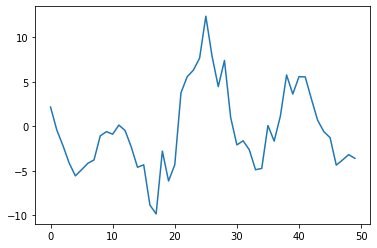

In [6]:
ts = X_decimated_scaled_max[0]
plt.plot(ts)
plt.show()

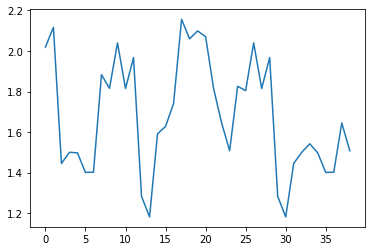

In [8]:
w = 12
mp, mpi = matrixProfile.stomp(ts, w)

plt.plot(mp)
plt.show()

# motif disc


In [10]:
mo, mod  = motifs.motifs(ts, (mp, mpi), max_motifs=5)

In [11]:
mo

[[1, 13, 30], [23, 38]]

In [12]:
mod

[1.1818064666958756, 1.508178833846268]

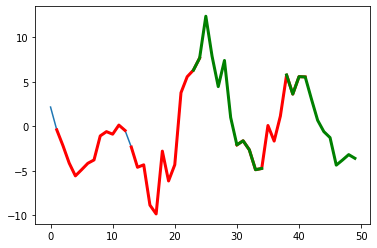

In [15]:
plt.plot(ts)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)

plt.show()

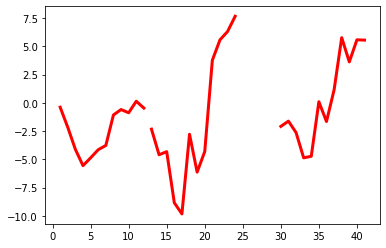

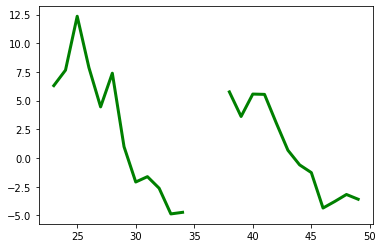

In [17]:
for m, d, c in zip(mo, mod, colors):
    for i in m:
        m_shape = ts[i:i+w]
        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    plt.show()

# Anomaly Discovery

In [19]:
from matrixprofile.discords import discords

In [20]:
anoms = discords(mp, ex_zone=3, k=5)

In [21]:
anoms


array([17,  1, 20,  9, 26])

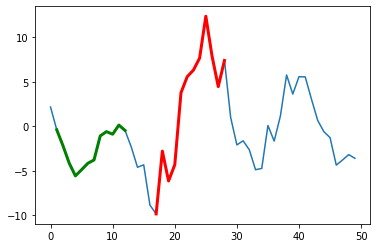

In [22]:
plt.plot(ts)
colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
for a, c in zip(anoms, colors):
    a_shape = ts[a:a+w]
    plt.plot(range(a, a+w), a_shape, color=c, lw=3)

plt.show()